## Stats 211 Problem set 2

Camellia Haghverdian

Grant and Loan Repayment

02/20/2024

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university

H1: State governments give more money to students at universities that are doing more research. This is my hypothesis because I think governments value research, and so they provide moe grant aid to students at research-based universities.

2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**

H2: I think if the overall net price for low-income students decreases, the portions of loan repayment will become more manageable for these students and lessen the burden or the pressure of repayment.

### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. read the data in [preferably only variables you are going to use]

In [34]:
set more off
*set scheme plotplainblind
*capture log close
*log using w5lecture_ols_log20200218.log
insheet using grants2015_college_affordability20200218.csv, clear
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

(8 vars, 581 obs)


### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

In [28]:
collapse (mean) mn_sgrnt_low=sgrnt_low ///
(semean) se_sgrnt_low=sgrnt_low ///
, by(hgroup)
generate hi_sgrnt_low = mn_sgrnt_low + 1.96*se_sgrnt_low
generate lo_sgrnt_low = mn_sgrnt_low - 1.96*se_sgrnt_low

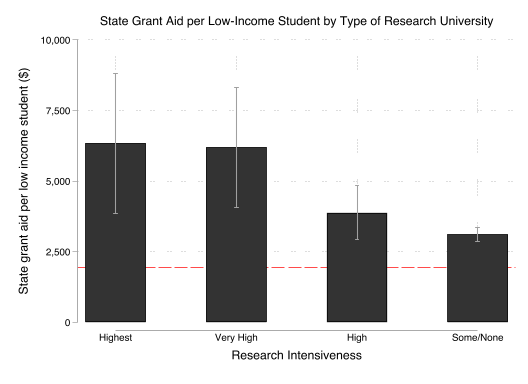

In [32]:
graph twoway (bar mn_sgrnt_low hgroup, barw(.5)) ///
(rcap hi_sgrnt_low lo_sgrnt_low hgroup) , ///
xlabel( 1 "Highest" 2 "Very High" 3 "High" 4 "Some/None", noticks) ///
ytitle("State grant aid per low income student ($)") ///
ylabel(0(2500)10000, format(%10.0fc)) ///
xtitle("Research Intensiveness") legend(off) name(sgrntbar, replace) ///
title("State Grant Aid per Low-Income Student by Type of Research University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The confidence intervals almost overlap entirely between universities with Highest and Very High amount of research, and overlap partially with universities of High research intensiveness. However, the bar graph shows that the confidence interval of universities with Some/None research don't have any overlap with universities of Highest/Very High research intensiveness, which means these universities get very little state grant aid per low income student. In other words, if a university conducts some or no research at all, their low income students don't receive any state grant at all.

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [36]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)
reg y_lo_inc_rpy netprice4lowincome

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc

      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------

### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?
The co-efficient of my independent variable is -.0011662. There is a negative relationship between low income loan repayment and net price and the size is very small.

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?
The p-value for the independent variable is 0.007. Based on this number, we can have a lot of confidence in the estimated relationship.

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable? 
The R-squared coefficient of determination is 0.2148. Only around %20 of the variation in the dependent variable is explained by the independent variable.

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?
The F ratio is 8.48. Given the high value of the F ratio (8.48) and the probability value associated with it (0.0066), we can be confident about our R-squared estimate.

### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

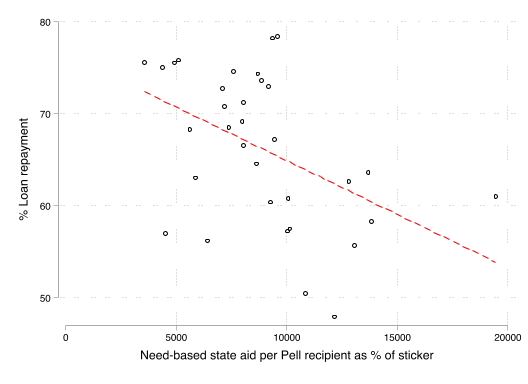

In [39]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)